# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  


## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv('ExtraaLearn.csv')
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

print media type1 and print media type2 are a little confusing so we will rename them to Newspaper and Magazine, respectively

In [4]:
data = data.rename(columns={'print_media_type1' : 'newspaper', 'print_media_type2': 'magazine'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   newspaper              4612 non-null   object 
 10  magazine               4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [7]:
percentage_converted = data.status.value_counts()
print("Percentage of total that have signed up is: %", round(percentage_converted[1]/len(data)*100, 1))

Percentage of total that have signed up is: % 29.9


## Observations 
- There does not appear to be any missing values.
- The Mean age is surprisingly around 46 which indicates a relativley older audience.
- Time spent on website has a large standard deviation 
- There is only a ~30% conversion rate to customers

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Let's Explore our age Demographic first

<Axes: xlabel='age', ylabel='Count'>

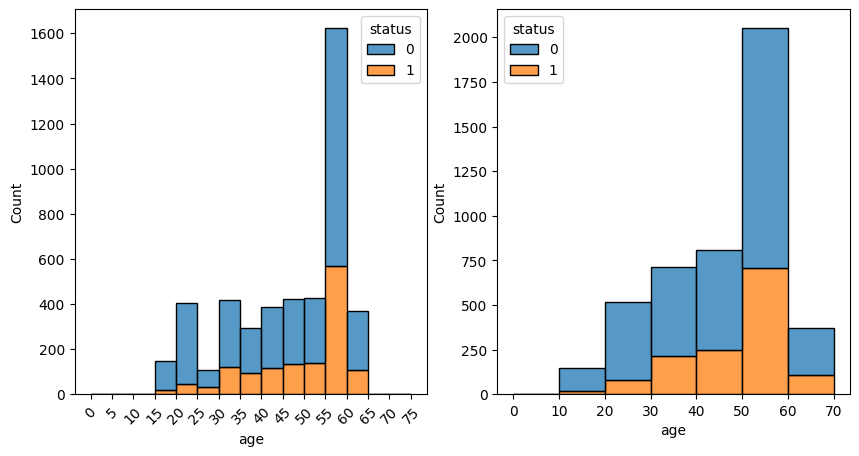

In [8]:
bins_5 = np.arange(0, 80, 5)
bins_10 = np.arange(0,80, 10)
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(x = data['age'], bins = bins_5, hue = data['status'], multiple = 'stack')
plt.xticks(bins_5, rotation = 45)
plt.subplot(1,2,2)
sns.histplot(x = data['age'], bins = bins_10, hue = data['status'], multiple = 'stack' )


- We can observe that a majority or "subscribers" are 55 - 60 years old.
- At each age group about half the amount of people actually sign up, except for younger ages 15 - 25. 

## Now Let's Explore Occupation Demographic

<Axes: xlabel='current_occupation', ylabel='count'>

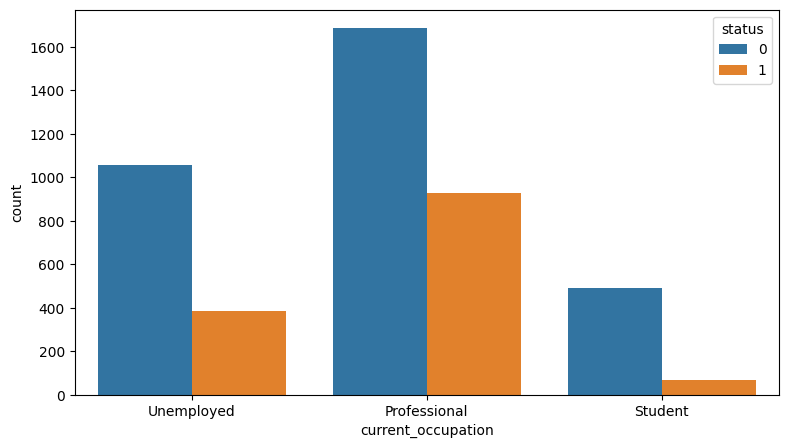

In [9]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.countplot(x = data['current_occupation'], hue = data['status'])


In [10]:
occ_demo = data.groupby(['current_occupation'], as_index = False)['status'].value_counts()
occ_demo

,current_occupation,status,count
0,Professional,0,1687
1,Professional,1,929
2,Student,0,490
3,Student,1,65
4,Unemployed,0,1058
5,Unemployed,1,383


In [11]:
# Calculate the total count for each occupation
total_counts = occ_demo.groupby('current_occupation')['count'].sum().reset_index()

# Calculate the percentage of individuals with 'status' 1 for each occupation
percent = occ_demo[occ_demo['status'] == 1].groupby('current_occupation')['count'].sum().reset_index(name='status_1_count')
percent = pd.merge(total_counts, percent, on='current_occupation')
percent['percentage'] = np.round((percent['status_1_count'] / percent['count']) * 100, 1)
percent



,current_occupation,count,status_1_count,percentage
0,Professional,2616,929,35.5
1,Student,555,65,11.7
2,Unemployed,1441,383,26.6


## Observations:
- A majority of people who subscribe are professional class, followed by Unemployed, then student

## Lets see how many hours people spend on the site

0.95

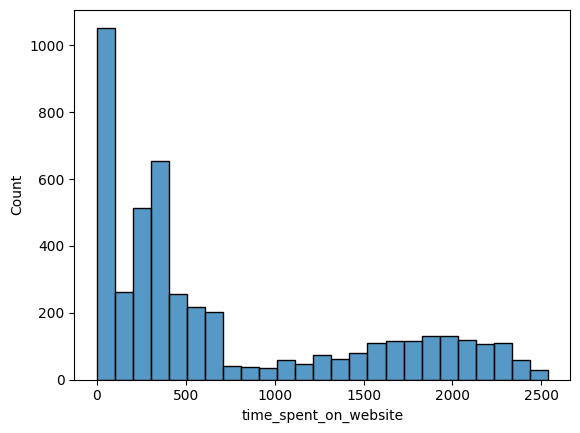

In [12]:
sns.histplot(x = data['time_spent_on_website'], binwidth= 100)
np.round(data['time_spent_on_website'].skew(), 2)


first_interaction


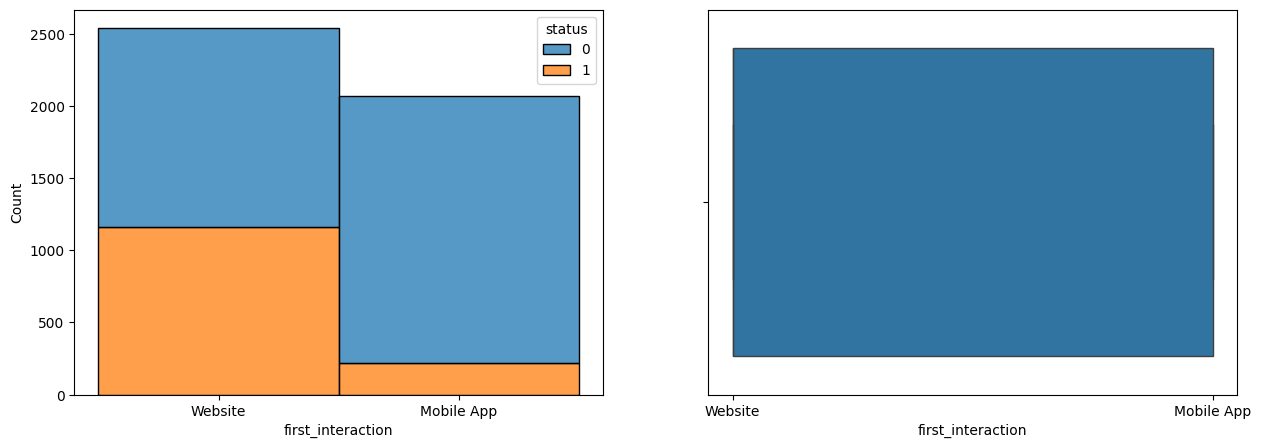

profile_completed


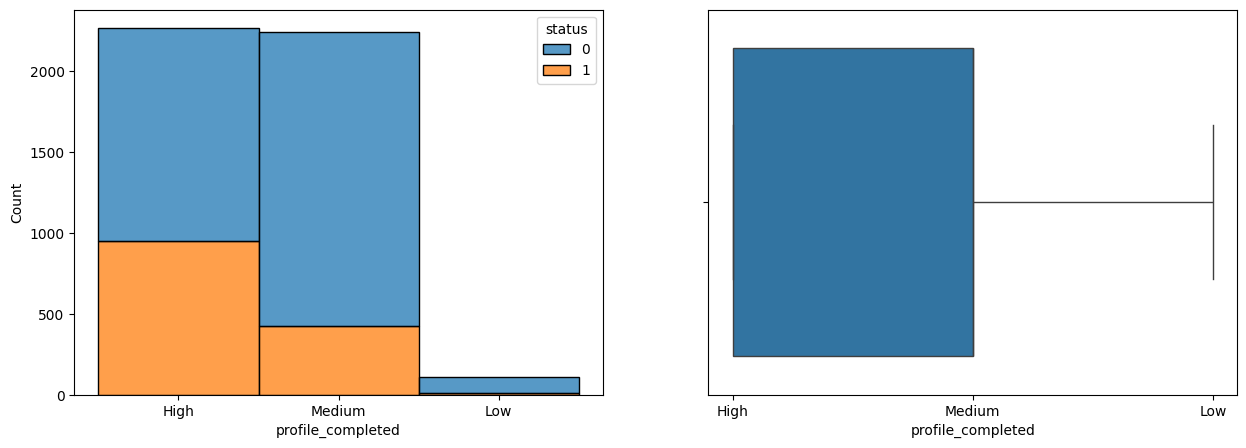

website_visits


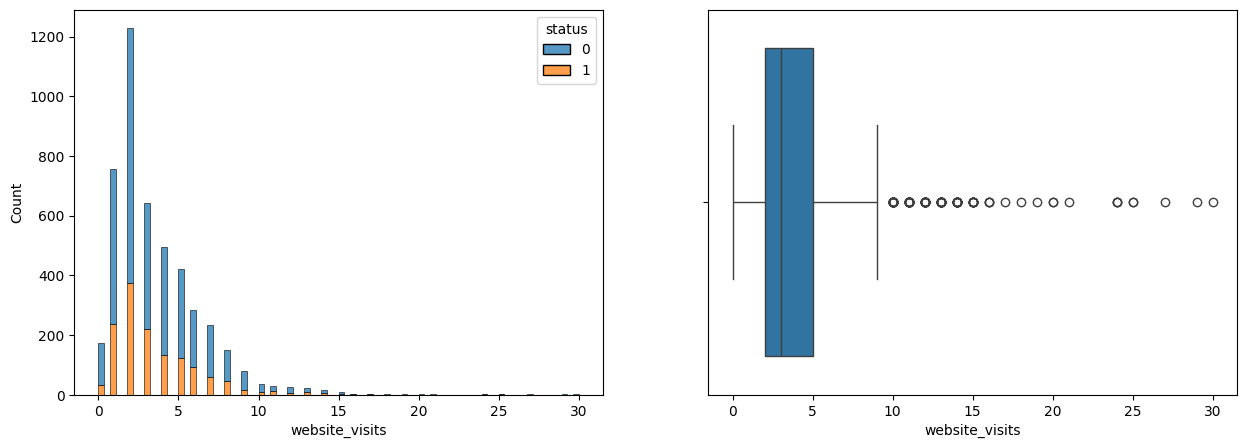

time_spent_on_website


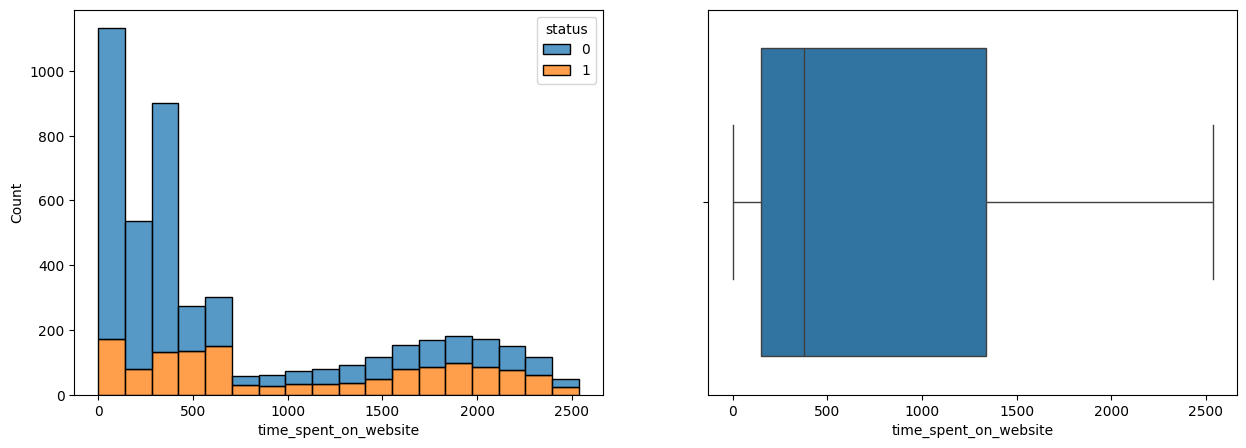

page_views_per_visit


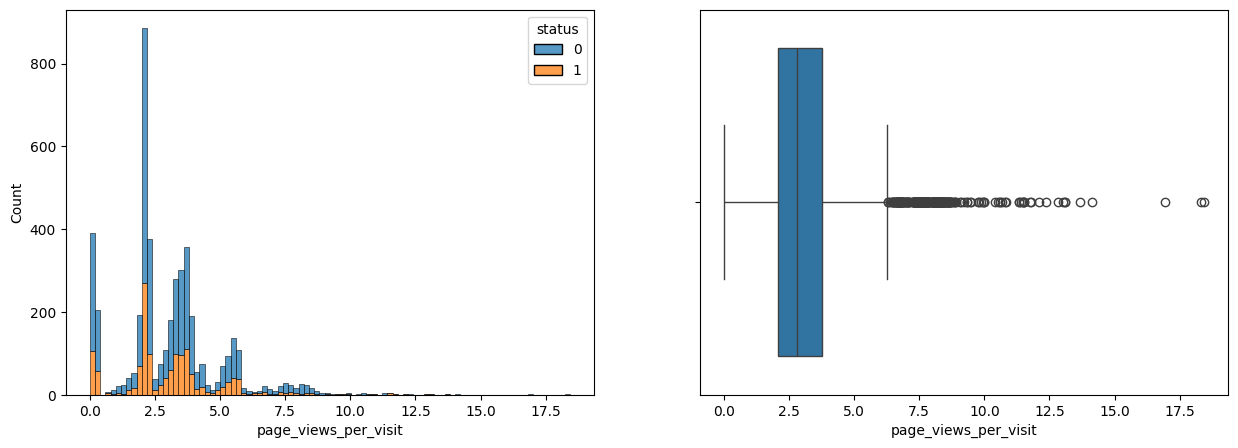

In [13]:
for col in data.columns[3:8]:
    print(col)
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    sns.histplot(x = data[col], hue = data['status'], multiple = 'stack')
    plt.subplot(1,2,2)
    sns.boxplot(x = data[col])
    plt.show()

## Let's look at the other forms of channels

newspaper
number of people that signed on through  newspaper : 159


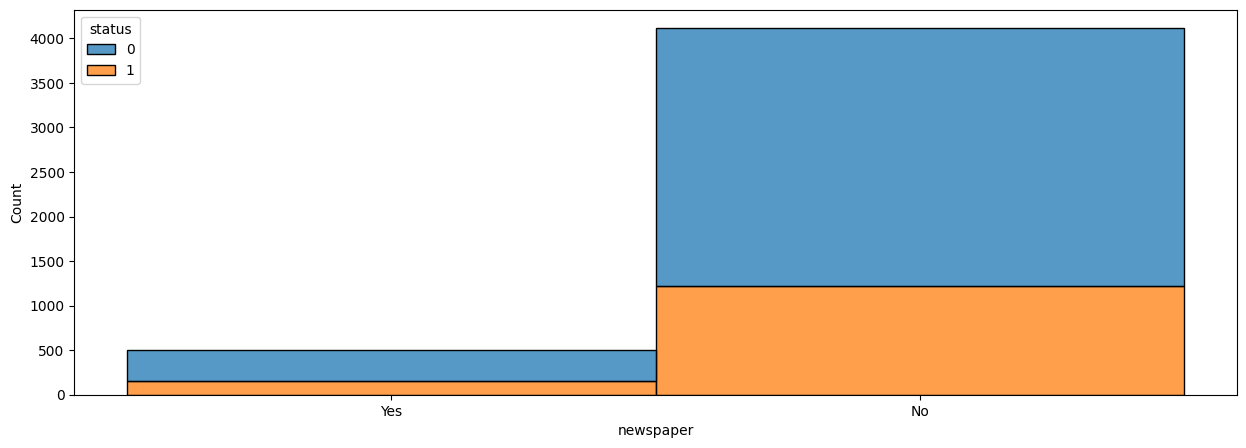

magazine
number of people that signed on through  magazine : 75


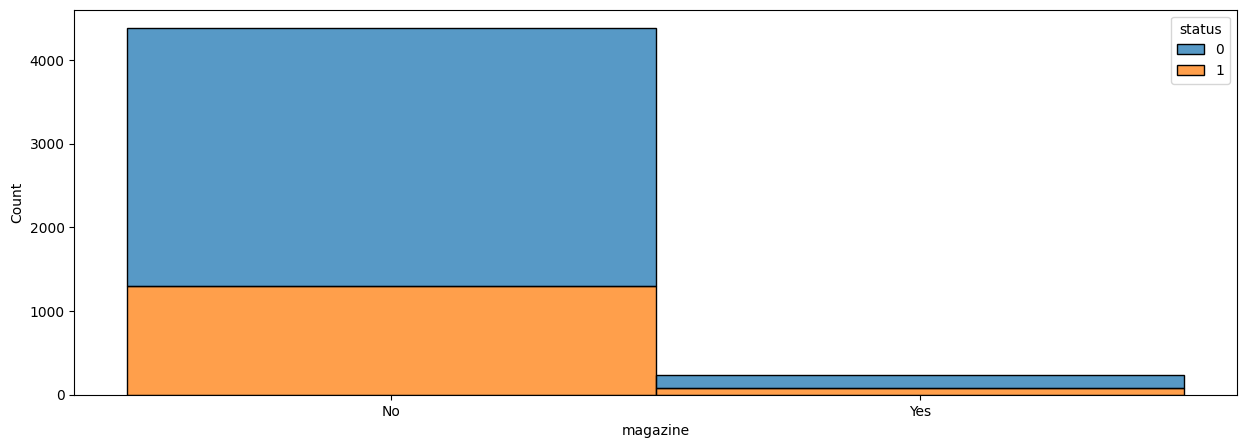

digital_media
number of people that signed on through  digital_media : 168


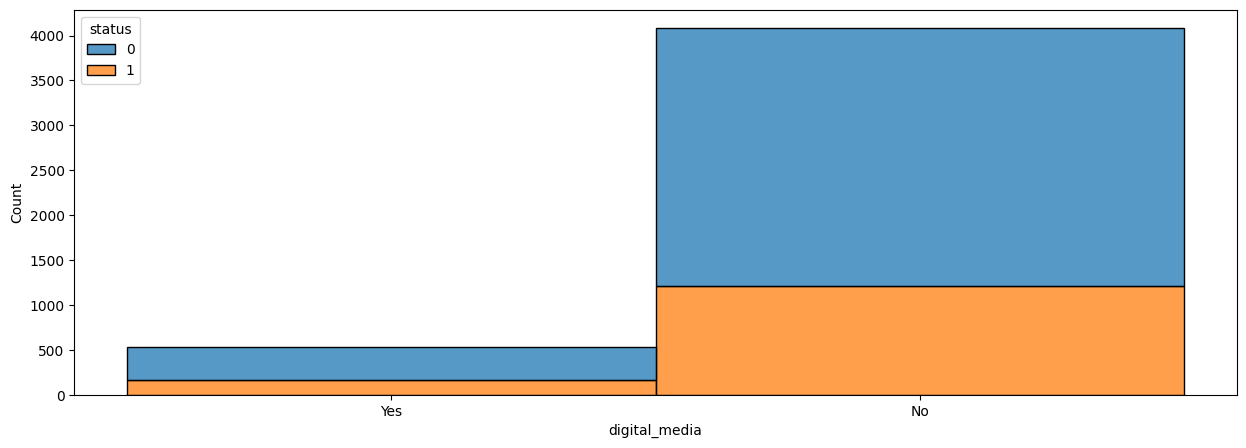

educational_channels
number of people that signed on through  educational_channels : 197


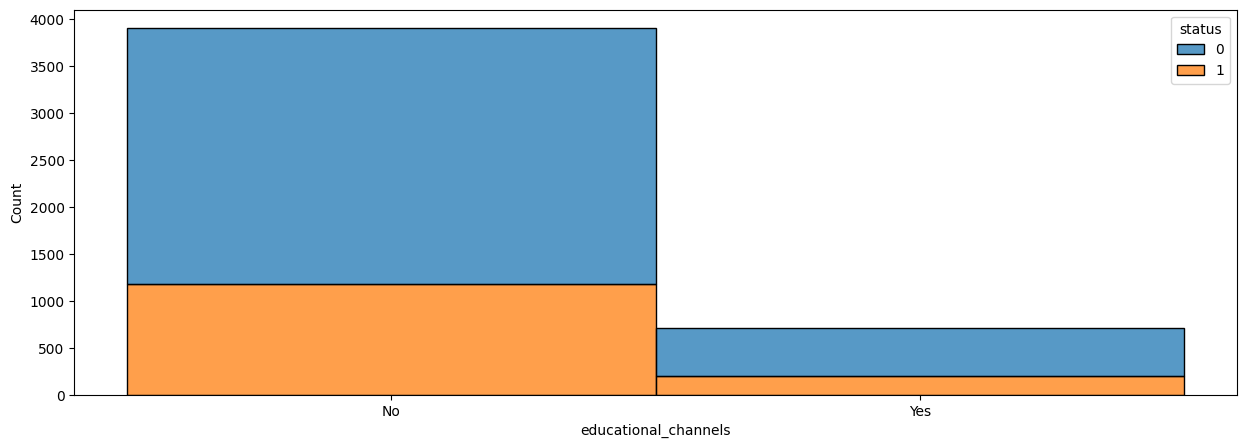

In [14]:
distribution_channels = ['newspaper', 'magazine', 'digital_media', 'educational_channels', 'None']
channels = pd.DataFrame(columns = distribution_channels)
channels.loc['Value'] = [None, None, None, None, None]
total_yes = 0

for col in data.columns[9:13]:
    print(col)
    condition1 = data[col] == 'Yes'
    condition2 = data['status'] == 1
    yes = (condition1 & condition2).sum() #amount of people that joined with specific type of advertising
    no = (~condition1 & condition2).sum() #amount of people that have joined but did not use any kind of advertising
    total_yes = total_yes + yes
    channels.at['Value', col] = yes
    channels.at['Value', 'None'] = no
    print('number of people that signed on through ', col, ':', yes)
    plt.figure(figsize = (15,5))
    sns.histplot(x = data[col], hue = data['status'], multiple = 'stack')
    plt.show()

Leads with advertising:  599
Leads without advertising:  1180


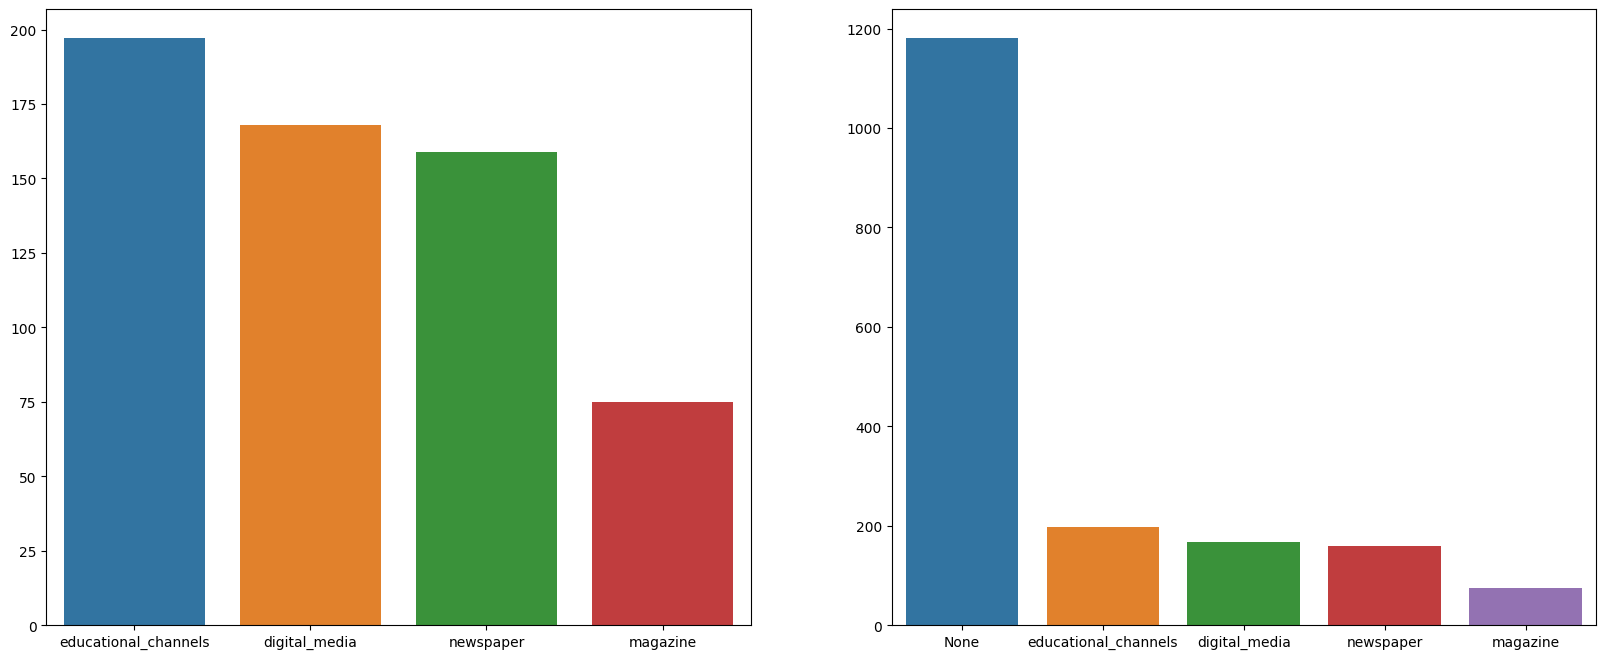

In [15]:
channels = channels.sort_values(by='Value', axis = 1, ascending = False)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(channels.iloc[:,1:5])

plt.subplot(1,2,2)
sns.barplot(channels)
print('Leads with advertising: ', total_yes)
print('Leads without advertising: ', no)

In [16]:
channels

,None,educational_channels,digital_media,newspaper,magazine
Value,1180,197,168,159,75


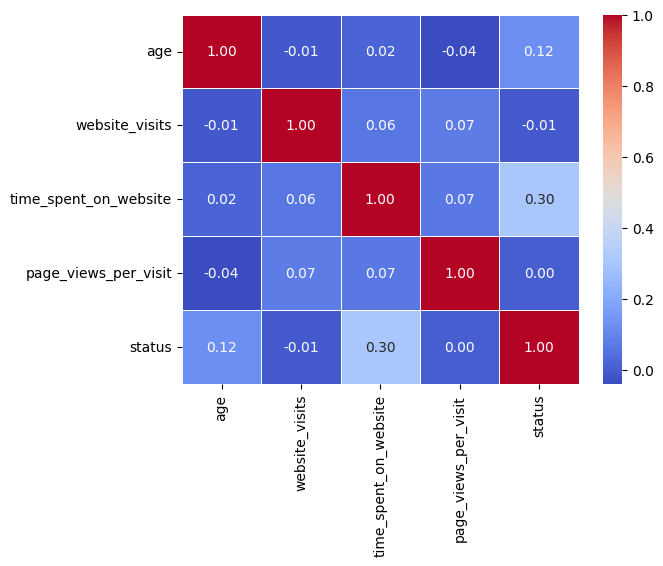

In [17]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Create a subset DataFrame with only numeric columns
numeric_df = data[numeric_columns]

# Create a heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

## Observations:
- It looks like time_spent_on_website and age are significant factors for leads

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Answers ##
1. It was shown above that a majority of leads had jobs. 
- 35.5% of leads were professional
- 26.6 were unemployed
- 11.7% were students
2. Based on the plots developed in examining hours spent on the site. It was found that a majority of people joined after first interacting with the company website. 
3. I believe the website is best when it comes to interacting with customers, data is supported by time spent on website, website compared to app, and website visits.
4. Leads through educational_channels have the most conversion rates.
    1. Educational Channels = 197 leads
    2. Digital Media = 168 leads
    3. Newspaper = 159 leads
    4. Magazine = 75 leads
5. People that have finished >50% of their profile are more likely to become leads. 


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [18]:
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
newspaper                0
magazine                 0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [19]:
data.info()
train_data = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   newspaper              4612 non-null   object 
 10  magazine               4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

ID and status can both be removed from the dataset. 
- ID - pointless to have since we are trying to generalize to a certain demographic
- status - we are creating a model for this so this should not be included in training=

In [20]:
train_data = train_data.drop(["ID", "status"], axis = 1)
status = data[['status']]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   newspaper              4612 non-null   object 
 9   magazine               4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 468.5+ KB


## Creating Dummy Variables

In [21]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns = x.select_dtypes(include = ["object", "category"]).columns.tolist(),
        drop_first = False,
    )
    return x

In [22]:
train_data #old training data

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,newspaper,magazine,digital_media,educational_channels,referral
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No


In [23]:
train_dummy = encode_cat_vars(train_data) #training data after one hot encoded
train_dummy

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,...,newspaper_No,newspaper_Yes,magazine_No,magazine_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,False,False,True,False,True,True,...,False,True,True,False,False,True,True,False,True,False
1,56,2,83,0.320,True,False,False,True,False,False,...,True,False,True,False,True,False,False,True,True,False
2,52,3,330,0.074,True,False,False,False,True,False,...,True,False,True,False,False,True,True,False,True,False
3,53,4,464,2.057,False,False,True,False,True,True,...,True,False,True,False,True,False,True,False,True,False
4,23,4,600,16.914,False,True,False,False,True,True,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,False,False,True,True,False,False,...,True,False,True,False,True,False,False,True,True,False
4608,55,8,2327,5.393,True,False,False,True,False,False,...,True,False,True,False,True,False,True,False,True,False
4609,58,2,212,2.692,True,False,False,False,True,True,...,True,False,True,False,True,False,True,False,True,False
4610,57,1,154,3.879,True,False,False,True,False,False,...,False,True,True,False,True,False,True,False,True,False


## Looks like our data has no null values, no errors, and the categorical values have been one-hot encoded. 

## Let's create out train and test data sets now.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_1, test_1, status_train, status_test = train_test_split(train_dummy, status, test_size = .2, random_state = 42)
status_train.info()
print()
status_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3689 entries, 3388 to 860
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  3689 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 1073 to 1479
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  923 non-null    int64
dtypes: int64(1)
memory usage: 14.4 KB


## Building a Decision Tree model

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [27]:
dtree = DecisionTreeClassifier(random_state = 42)

In [28]:
dtree.fit(train_1, status_train)

DecisionTreeClassifier(random_state=42)

In [29]:
tree_predict_train = dtree.predict(train_1)
print("Accuracy : ", accuracy_score(status_train['status'], tree_predict_train))

Accuracy :  0.9997289238275956


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
y_true = status_train['status']  # Example true labels
y_pred = tree_predict_train  # Example predicted labels

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y_true, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_true, y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9997
Precision: 1.0000
Recall: 0.9991
F1 Score: 0.9995
Confusion Matrix:
[[2586    0]
 [   1 1102]]


## Let's see how our model predicts the test data

In [31]:
tree_predict_test = dtree.predict(test_1)
y_true = status_test['status']  # Example true labels
y_pred = tree_predict_test  # Example predicted labels

# Accuracy
accuracy_b = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_b:.4f}')

# Precision
precision_b = precision_score(y_true, y_pred)
print(f'Precision: {precision_b:.4f}')

# Recall
recall_b = recall_score(y_true, y_pred)
print(f'Recall: {recall_b:.4f}')

# F1 Score
f1_b = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_b:.4f}')

# Confusion Matrix
cm_b = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_b)


Accuracy: 0.8277
Precision: 0.7203
Recall: 0.6861
F1 Score: 0.7028
Confusion Matrix:
[[576  73]
 [ 86 188]]


Let's look at our decision tree

In [32]:
from sklearn.tree import plot_tree

[Text(0.40512048192771083, 0.9285714285714286, 'first_interaction_Website <= 0.5\ngini = 0.419\nsamples = 3689\nvalue = [2586, 1103]\nclass = Not Converted'),
 Text(0.14909638554216867, 0.7857142857142857, 'time_spent_on_website <= 419.5\ngini = 0.189\nsamples = 1660\nvalue = [1485, 175]\nclass = Not Converted'),
 Text(0.060240963855421686, 0.6428571428571429, 'referral_No <= 0.5\ngini = 0.013\nsamples = 916\nvalue = [910, 6]\nclass = Not Converted'),
 Text(0.03614457831325301, 0.5, 'website_visits <= 11.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = Not Converted'),
 Text(0.024096385542168676, 0.35714285714285715, 'page_views_per_visit <= 6.371\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = Not Converted'),
 Text(0.012048192771084338, 0.21428571428571427, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Not Converted'),
 Text(0.03614457831325301, 0.21428571428571427, 'page_views_per_visit <= 9.811\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Converted'),
 Te

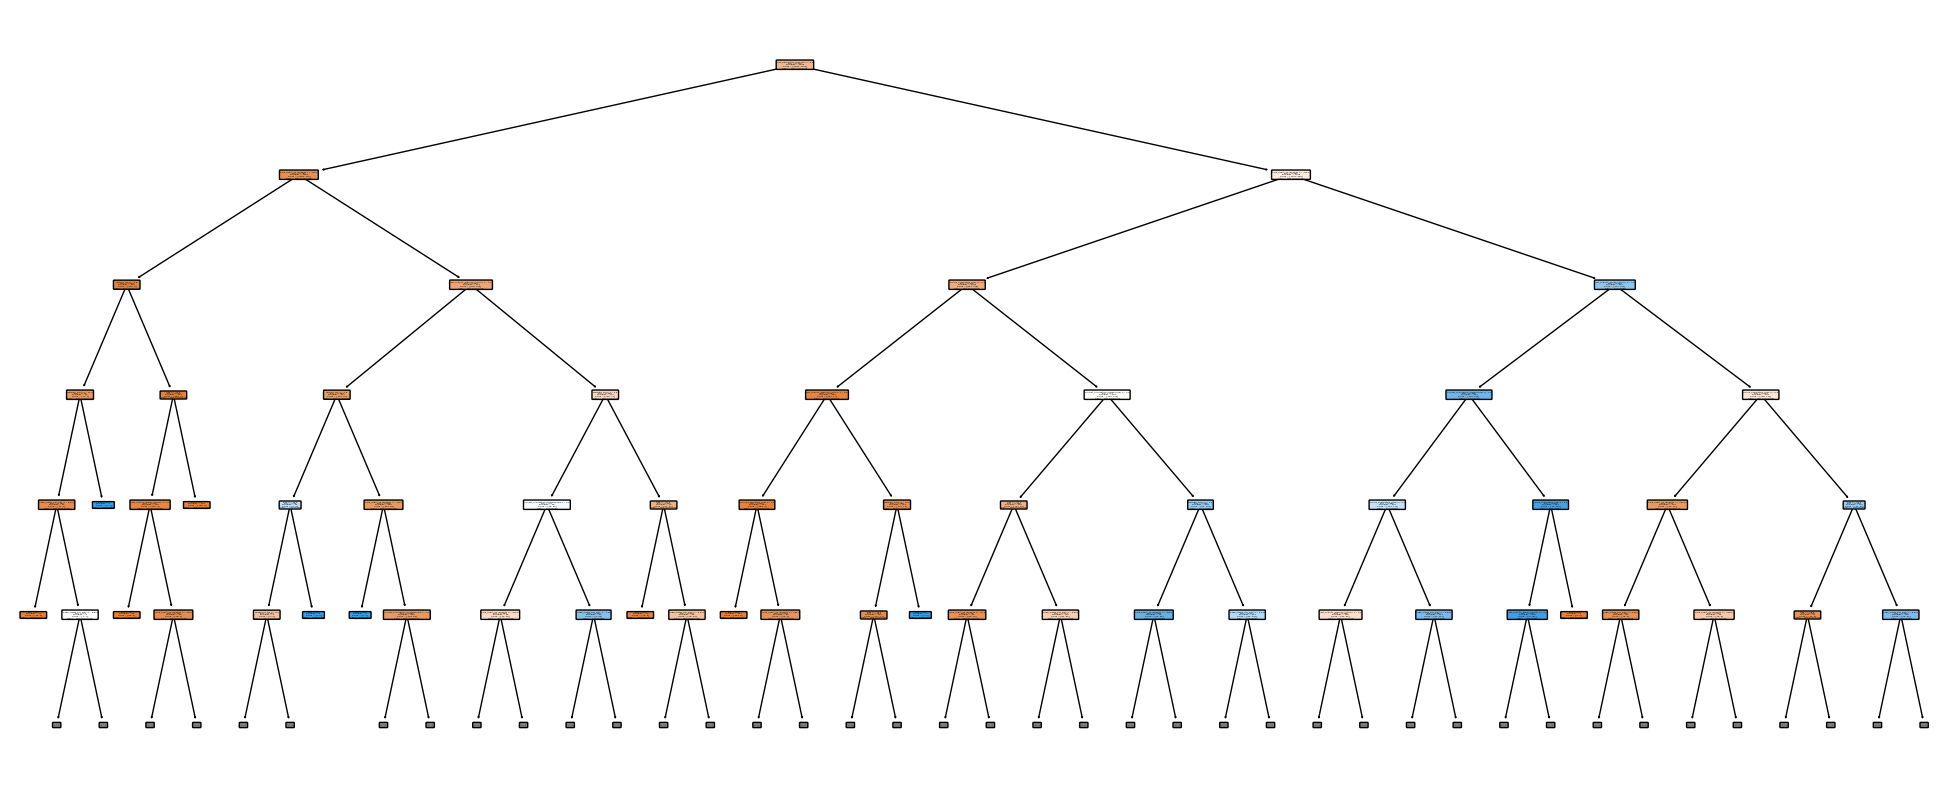

In [33]:
plt.figure(figsize = (25,10))
plot_tree(dtree, filled = True, feature_names = train_1.columns.tolist(), class_names=['Not Converted', 'Converted'], rounded=True, max_depth = 5)

## Do we need to prune the tree?

The decision tree gets pretty out of hand by depth 5. There is also high R-square on the training dataset but very low R-square on the test data. This usually signifies that our model is overfitting and not generalizing to the test data very well. 

We will examine 3 methods of tree pruning to make the model generalize better:
1. Setting a minimum impurity decrease to split
2. Limit the tree depth
3. Setting a minimum sample per leaf

## 1. Minimum_impurity_decrease

In [34]:
dtree_min_impurity = DecisionTreeClassifier(random_state = 42, min_impurity_decrease= 0.0005)
dtree_min_impurity.fit(train_1, status_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)

In [35]:
tree_predict_train = dtree_min_impurity.predict(train_1)
print("Train Accuracy : ", accuracy_score(status_train['status'], tree_predict_train))

print('-------------------------------------------------')

tree_predict_test = dtree_min_impurity.predict(test_1)
print("Test Accuracy : ", accuracy_score(status_test, tree_predict_test))

Train Accuracy :  0.8986175115207373
-------------------------------------------------
Test Accuracy :  0.8689057421451788


In [36]:
y_true = status_test['status']  # Example true labels
y_pred = tree_predict_test  # Example predicted labels

# Accuracy
accuracy_1 = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_1:.4f}')

# Precision
precision_1 = precision_score(y_true, y_pred)
print(f'Precision: {precision_1:.4f}')

# Recall
recall_1 = recall_score(y_true, y_pred)
print(f'Recall: {recall_1:.4f}')

# F1 Score
f1_1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_1:.4f}')

# Confusion Matrix
cm_1 = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_1)

Accuracy: 0.8689
Precision: 0.8097
Recall: 0.7299
F1 Score: 0.7678
Confusion Matrix:
[[602  47]
 [ 74 200]]


## 2. Limit Tree Depth

In [37]:
dtree_tree_depth = DecisionTreeClassifier(random_state = 42, max_depth=15)
dtree_tree_depth.fit(train_1, status_train)

tree_predict_train = dtree_tree_depth.predict(train_1)
print("Accuracy : ", accuracy_score(status_train['status'], tree_predict_train))

print('Test Data ----------------------------------')

tree_predict_test = dtree_tree_depth.predict(test_1)
print("Accuracy : ", accuracy_score(status_test, tree_predict_test))

Accuracy :  0.9842775820005422
Test Data ----------------------------------
Accuracy :  0.8320693391115926


In [38]:
y_true = status_test['status']  # Example true labels
y_pred = tree_predict_test  # Example predicted labels

# Accuracy
accuracy_2 = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_2:.4f}')

# Precision
precision_2 = precision_score(y_true, y_pred)
print(f'Precision: {precision_2:.4f}')

# Recall
recall_2 = recall_score(y_true, y_pred)
print(f'Recall: {recall_2:.4f}')

# F1 Score
f1_2 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_2:.4f}')

# Confusion Matrix
cm_2 = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_2)

Accuracy: 0.8321
Precision: 0.7212
Recall: 0.7080
F1 Score: 0.7145
Confusion Matrix:
[[574  75]
 [ 80 194]]


## 3. Minimum Samples Per Leaf

In [39]:
dtree_min_leaf = DecisionTreeClassifier(random_state = 42, min_samples_leaf=10)
dtree_min_leaf.fit(train_1, status_train)

tree_predict_train = dtree_min_leaf.predict(train_1)
print("Train Accuracy : ", accuracy_score(status_train['status'], tree_predict_train))

print('-------------------------------------------------')

tree_predict_test = dtree_min_leaf.predict(test_1)
print("Test Accuracy : ", accuracy_score(status_test, tree_predict_test))

Train Accuracy :  0.8942802927622662
-------------------------------------------------
Test Accuracy :  0.8515709642470206


In [40]:
y_true = status_test['status']  # Example true labels
y_pred = tree_predict_test  # Example predicted labels

# Accuracy
accuracy_3 = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_3:.4f}')

# Precision
precision_3 = precision_score(y_true, y_pred)
print(f'Precision: {precision_3:.4f}')

# Recall
recall_3 = recall_score(y_true, y_pred)
print(f'Recall: {recall_3:.4f}')

# F1 Score
f1_3 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_3:.4f}')

# Confusion Matrix
cm_3 = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_3)

Accuracy: 0.8516
Precision: 0.8018
Recall: 0.6642
F1 Score: 0.7265
Confusion Matrix:
[[604  45]
 [ 92 182]]


## Post Pruning Methods
1. cc_alpha
2. Feature importance

## 1. cc_alpha

In [41]:
dtree_cc_alpha = DecisionTreeClassifier(random_state = 42, ccp_alpha= 0.0008)
dtree_cc_alpha.fit(train_1, status_train)

tree_predict_train = dtree_cc_alpha.predict(train_1)
print("Train Accuracy : ", accuracy_score(status_train['status'], tree_predict_train))

print('Test Data ----------------------------------')

tree_predict_test = dtree_cc_alpha.predict(test_1)
print("Test Accuracy : ", accuracy_score(status_test, tree_predict_test))

Train Accuracy :  0.8883166169693684
Test Data ----------------------------------
Test Accuracy :  0.8678223185265439


In [42]:
y_true = status_test['status']  # Example true labels
y_pred = tree_predict_test  # Example predicted labels

# Accuracy
accuracy_4 = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_4:.4f}')

# Precision
precision_4 = precision_score(y_true, y_pred)
print(f'Precision: {precision_4:.4f}')

# Recall
recall_4 = recall_score(y_true, y_pred)
print(f'Recall: {recall_4:.4f}')

# F1 Score
f1_4 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_4:.4f}')

# Confusion Matrix
cm_4 = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_4)

Accuracy: 0.8678
Precision: 0.8193
Recall: 0.7117
F1 Score: 0.7617
Confusion Matrix:
[[606  43]
 [ 79 195]]


## Results:

In [43]:
index = ['Accuracy', 'Precision', 'Recall','F1 Score','Confusion Matrix']
data = [[accuracy_b, accuracy_1, accuracy_2, accuracy_3, accuracy_4], [precision_b, precision_1, precision_2, precision_3, precision_4], [recall_b, recall_1, recall_2, recall_3, recall_4], [f1_b, f1_1, f1_2, f1_3, f1_4], [cm_b, cm_1, cm_2, cm_3, cm_4]]
columns = ['normal tree' , 'min impurity', 'max depth', 'min leaf', 'cc_alpha']

results = pd.DataFrame(data = data, columns = columns, index = index)

In [44]:
print(results.T)

              Accuracy Precision    Recall  F1 Score        Confusion Matrix
normal tree   0.827736  0.720307  0.686131  0.702804  [[576, 73], [86, 188]]
min impurity  0.868906  0.809717  0.729927  0.767754  [[602, 47], [74, 200]]
max depth     0.832069   0.72119  0.708029  0.714549  [[574, 75], [80, 194]]
min leaf      0.851571  0.801762  0.664234  0.726547  [[604, 45], [92, 182]]
cc_alpha      0.867822  0.819328  0.711679  0.761719  [[606, 43], [79, 195]]


we'll go with the cc_alpha tree since it perofrms better than the standard tree

In [45]:
feature_importance = dtree_cc_alpha.feature_importances_
column_names = train_1.columns
for column, importance in zip(column_names, feature_importance):
    print(f"{column}: {importance}")

age: 0.04032897844065748
website_visits: 0.014092425183404563
time_spent_on_website: 0.2901640273277934
page_views_per_visit: 0.026340122078463743
current_occupation_Professional: 0.09623327100144954
current_occupation_Student: 0.0
current_occupation_Unemployed: 0.004631668035174548
first_interaction_Mobile App: 0.0
first_interaction_Website: 0.24334403682683517
profile_completed_High: 0.18337428538141443
profile_completed_Low: 0.012106487560638075
profile_completed_Medium: 0.0
last_activity_Email Activity: 0.0
last_activity_Phone Activity: 0.048663182542283655
last_activity_Website Activity: 0.026928196492729005
newspaper_No: 0.0
newspaper_Yes: 0.0
magazine_No: 0.0
magazine_Yes: 0.0
digital_media_No: 0.0030336735154210715
digital_media_Yes: 0.0
educational_channels_No: 0.0
educational_channels_Yes: 0.004660313907052358
referral_No: 0.006099331706682926
referral_Yes: 0.0


In [46]:
feat_imp = pd.DataFrame({'Feature': column_names, 'Feature Importance' : feature_importance})
sorted = feat_imp.sort_values(by = 'Feature Importance', ascending= False)

In [47]:
# Define a function to apply custom formatting based on significance
def highlight_significant(value):
    threshold = 0.04  # Adjust this threshold as needed
    return f"background-color: {'blue' if abs(value) >= threshold else ''}"

In [48]:
# Apply the custom formatting to the 'Feature Importance' column
styled_df = sorted.style.applymap(highlight_significant, subset=['Feature Importance'])

# Display the styled DataFrame
styled_df

,Feature,Feature Importance
2,time_spent_on_website,0.290164
8,first_interaction_Website,0.243344
9,profile_completed_High,0.183374
4,current_occupation_Professional,0.096233
13,last_activity_Phone Activity,0.048663
0,age,0.040329
14,last_activity_Website Activity,0.026928
3,page_views_per_visit,0.026340
1,website_visits,0.014092
10,profile_completed_Low,0.012106


## The top contributors to leads based on decision tree are:
1. Time spent on website
2. First interaction with website
3. Fully completed profile
4. Professional Occupation
5. Last phone activity
6. Age (30 - 65 yrs)

## Building a Random Forest model

TRAIN - train_1 & status_train  
TEST - test_1  & status_test


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
r_forest = RandomForestClassifier(random_state=42)

In [51]:
r_forest.fit(train_1, status_train)

c:\Users\19738\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [52]:
r_f_predict = r_forest.predict(train_1)
y_true = status_train['status']  # Example true labels
y_pred = r_f_predict  # Example predicted labels

# Accuracy
accuracy_4 = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_4:.4f}')

# Precision
precision_4 = precision_score(y_true, y_pred)
print(f'Precision: {precision_4:.4f}')

# Recall
recall_4 = recall_score(y_true, y_pred)
print(f'Recall: {recall_4:.4f}')

# F1 Score
f1_4 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_4:.4f}')

# Confusion Matrix
cm_4 = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_4)

Accuracy: 0.9997
Precision: 1.0000
Recall: 0.9991
F1 Score: 0.9995
Confusion Matrix:
[[2586    0]
 [   1 1102]]


In [53]:
r_f_predict = r_forest.predict(test_1)
y_true = status_test['status']  # Example true labels
y_pred = r_f_predict  # Example predicted labels

# Accuracy
accuracy_rf = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_rf:.4f}')

# Precision
precision_rf = precision_score(y_true, y_pred)
print(f'Precision: {precision_rf:.4f}')

# Recall
recall_rf = recall_score(y_true, y_pred)
print(f'Recall: {recall_rf:.4f}')

# F1 Score
f1_rf = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_rf:.4f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_rf)

Accuracy: 0.8678
Precision: 0.8276
Recall: 0.7007
F1 Score: 0.7589
Confusion Matrix:
[[609  40]
 [ 82 192]]


In [54]:
r_forest_1000 = RandomForestClassifier(random_state=42, n_estimators= 125)
r_forest_1000.fit(train_1, status_train)
r_f_1000_pred = r_forest_1000.predict(test_1)

y_true = status_test['status']  # Example true labels
y_pred = r_f_1000_pred  # Example predicted labels

# Accuracy
accuracy_rf = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_rf:.4f}')

# Precision
precision_rf = precision_score(y_true, y_pred)
print(f'Precision: {precision_rf:.4f}')

# Recall
recall_rf = recall_score(y_true, y_pred)
print(f'Recall: {recall_rf:.4f}')

# F1 Score
f1_rf = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_rf:.4f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_rf)

c:\Users\19738\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8711
Precision: 0.8270
Recall: 0.7153
F1 Score: 0.7671
Confusion Matrix:
[[608  41]
 [ 78 196]]


## Do we need to prune the tree?

In [55]:
r_forest_1 = RandomForestClassifier(random_state=42, n_estimators= 125, min_samples_leaf=2, max_depth=15, min_impurity_decrease=.00001)
r_forest_1.fit(train_1, status_train)
r_f_1000_pred = r_forest_1.predict(test_1)

y_true = status_test['status']  # Example true labels
y_pred = r_f_1000_pred  # Example predicted labels

# Accuracy
accuracy_rf_1 = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy_rf_1:.4f}')

# Precision
precision_rf_1 = precision_score(y_true, y_pred)
print(f'Precision: {precision_rf_1:.4f}')

# Recall
recall_rf_1 = recall_score(y_true, y_pred)
print(f'Recall: {recall_rf_1:.4f}')

# F1 Score
f1_rf_1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1_rf_1:.4f}')

# Confusion Matrix
cm_rf_1 = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm_rf_1)

c:\Users\19738\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8776
Precision: 0.8397
Recall: 0.7263
F1 Score: 0.7789
Confusion Matrix:
[[611  38]
 [ 75 199]]


In [56]:
data1 = [accuracy_rf, precision_rf, recall_rf,f1_rf, cm_rf]
data2 = [accuracy_rf_1, precision_rf_1, recall_rf_1, f1_rf_1, cm_rf_1]

results['random forest'] = data1
results['random forest pruned'] = data2
results.T

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
normal tree,0.827736,0.720307,0.686131,0.702804,"[[576, 73], [86, 188]]"
min impurity,0.868906,0.809717,0.729927,0.767754,"[[602, 47], [74, 200]]"
max depth,0.832069,0.72119,0.708029,0.714549,"[[574, 75], [80, 194]]"
min leaf,0.851571,0.801762,0.664234,0.726547,"[[604, 45], [92, 182]]"
cc_alpha,0.867822,0.819328,0.711679,0.761719,"[[606, 43], [79, 195]]"
random forest,0.871073,0.827004,0.715328,0.767123,"[[608, 41], [78, 196]]"
random forest pruned,0.877573,0.839662,0.726277,0.778865,"[[611, 38], [75, 199]]"


In [57]:
feature_importance_rf = r_forest_1.feature_importances_
feat_imp_rf = pd.DataFrame({'Feature': column_names, 'Feature Importance' : feature_importance_rf})
sorted = feat_imp_rf.sort_values(by = 'Feature Importance', ascending= False)
styled_df_rf = sorted.style.applymap(highlight_significant, subset=['Feature Importance'])

In [58]:
styled_df_rf

,Feature,Feature Importance
2,time_spent_on_website,0.260484
7,first_interaction_Mobile App,0.120354
8,first_interaction_Website,0.113953
0,age,0.074791
3,page_views_per_visit,0.074359
9,profile_completed_High,0.064267
11,profile_completed_Medium,0.055387
1,website_visits,0.041752
4,current_occupation_Professional,0.036194
13,last_activity_Phone Activity,0.031911


## The top contributors to leads based on random forest are:

1. Time spent on website
2. First interaction mobile app
3. First interaction website
4. Age (30 - 65 yrs)
5. Page views
6. Fully completed profile (High)
7. Partially completed profile (Medium)
8. Website visits


## The top contributors to leads based on decision tree are:

1. Time spent on website
2. First interaction with website
3. Fully completed profile
4. Professional Occupation
5. Last phone activity
6. Age (30 - 65 yrs)

## Actionable Insights and Recommendations

1. The website is a very useful in obtaining new leads. 
- Promote leads to spend more time on the website. This can be done through first advertising the website more. For advertisement on social media such as Facebook, instagram, or Youtube promote the website instead of other sources of print media.
- Improve the quality of the website, this can be down with more efficient layout of the website which promotes users to examine and explore different options more. 
2. Target the middle aged demographic (ages 30 - 65), these profiles seem to convert more perhaps because of their stage in life.
3. Target people that have jobs or are unemployed, students seem to have less tendency to join.
4. Target people who have completed their profile.
5. Lastly reach out to the person through phone call. 

Use additional resources to call the people that fall into the category above. 